### Google Colab Stuff

Todo: Program and test it

In [1]:
colab = False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')   

In [2]:
try:
    import talib
except:
    !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
    !tar -xzvf ta-lib-0.4.0-src.tar.gz
    %cd ta-lib
    !./configure --prefix=/usr
    !make
    !make install
    !pip install Ta-Lib

    import talib

In [3]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [4]:
import os
import sys
import pandas as pd
import numpy as np
import json
import copy
import pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
from datetime import datetime

### Add custom import path for DataStreamCreator and IndicatorCalculator

In [5]:
# Get the current directory
current_dir = os.getcwd()
current_dir_splitted = current_dir.split(os.sep)
current_dir_splitted

['', 'home', 'jovyan', 'CryptoCrystalBall', 'JupyterDocker', 'notebooks']

In [6]:
# Create the import directories for the DataStreamCreator and the IndicatorCalculator
dsc_dir = os.path.join(os.sep, *current_dir_splitted[:-2], 'DataStreamCreator')
print(f"dsc_dir: {dsc_dir}")

ind_dir = os.path.join(os.sep, *current_dir_splitted[:-2], 'IndicatorCalculator')
print(f"ind_dir: {ind_dir}")

# Add them to the import paths
sys.path.insert(0, dsc_dir)
sys.path.insert(0, ind_dir)

dsc_dir: /home/jovyan/CryptoCrystalBall/DataStreamCreator
ind_dir: /home/jovyan/CryptoCrystalBall/IndicatorCalculator


In [7]:
# Import the actual classes
from IndicatorCalculator import IndicatorCalculator
import DataStreamCreator

# Define all the parameters and variables

In [8]:
# Define the data path
DATA_PATH = os.path.join(os.sep, *current_dir_splitted[:-2], 'DemoData')
print(f"DATA_PATH: {DATA_PATH}")

DATA_PATH: /home/jovyan/CryptoCrystalBall/DemoData


In [9]:
# Define the chart image save path
IMG_SAVE_PATH = os.path.join(os.sep, *current_dir_splitted[:-2], 'Documentation', 'Images')
print(f"IMG_SAVE_PATH: {IMG_SAVE_PATH}")

IMG_SAVE_PATH: /home/jovyan/CryptoCrystalBall/Documentation/Images


In [10]:
# Define a global random seed
RANDOM_SEED = 11

# Set the seed in np
np.random.seed(RANDOM_SEED)

In [11]:
# Define the paths to two example OHLCV files
EXAMPLE_FILE_PATHS = [os.path.join(DATA_PATH, "BTC-USDT.csv"), os.path.join(DATA_PATH, "ETH-USDT.csv")]
EXAMPLE_FILE_PATHS

['/home/jovyan/CryptoCrystalBall/DemoData/BTC-USDT.csv',
 '/home/jovyan/CryptoCrystalBall/DemoData/ETH-USDT.csv']

In [12]:
X_BLOCK_LENGHT = 128

In [13]:
BATCH_SIZE = 32

In [14]:
SHORTSPAN = 6
MIDSPAN = 48
LONGSPAN = 120

In [15]:
Y_TYPE_DICT = copy.deepcopy(DataStreamCreator.YDataGenerator.PARAM_DICT_TEMPLATE_Y_DATA_TYPE_DIRECTION_FLOAT)
Y_TYPE_DICT

{'dataType': 0,
 'direction_ma_timespan': 200,
 'derivation_ma_timespan': 100,
 'direction_derivation_shift_span': 0}

# Demonstration of FileListToDataStream

This method creates a stream of `X-Block` and `y-data` arrays out of a list of csv file names. For details about `X-Blocks` and `y-data`, please refer to the documentation of the `XBlockGenerator` and the `YDataGenerator`.

Important in this example is, that the last timestamp of an X-Block (a frame from the past) matches the timestamp of the y-data entry (lookout into the future of the price).

In the example the first X/y pair at timestep `T` is picked:

    Shape of X-Block array: (BATCH_SIZE, X_BLOCK_LENGHT, FEATURES) -> (32, 128, 226) --> Pick first element at [0,:,:] --> xT=(128, 226), or (128 Timestep, 226 Features)
    Shape of y-data array: (BATCH_SIZE, DIRECTION & DERVIATION) -> (32, 2) --> Pick first element at [0,:] --> yT=(2), or (Price Direction and Direction Derivation)


In [16]:
# Initialize the FileListToDataStream generator
dataStream = DataStreamCreator.FileListToDataStream(fileList = EXAMPLE_FILE_PATHS,
                                                     batch_size = BATCH_SIZE,
                                                     X_Block_lenght = X_BLOCK_LENGHT,
                                                     y_type_dict=Y_TYPE_DICT
                                                    )
dataStream

INFO:root:File 'BTC-USDT.csv' loaded, 1 left
INFO:root:File 'ETH-USDT.csv' loaded, 0 left


In [17]:
# Get the first batch
batch = next(dataStream)
print(f"Shape of X-Block array: (BATCH_SIZE, X_BLOCK_LENGHT, FEATURES) -> {batch['X'].shape}")
print(f"Shape of y-data array: (BATCH_SIZE, DIRECTION & DERVIATION) -> {batch['y'].shape}")

Shape of X-Block array: (BATCH_SIZE, X_BLOCK_LENGHT, FEATURES) -> (32, 128, 226)
Shape of y-data array: (BATCH_SIZE, DIRECTION & DERVIATION) -> (32, 2)


In [18]:
list.reverse([1,2,3,4])

In [19]:
batch['X']

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00, -9.87114581e-04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00, -9.87114581e-04],
        ...,
        [ 0.00000000e+00,  2.63745789e+01,  2.60736014e+01, ...,
          0.00000000e+00,  1.15766820e+03, -9.87114581e-04],
        [ 0.00000000e+00,  2.61842447e+01,  2.60684701e+01, ...,
          0.00000000e+00,  1.15766820e+03, -9.87114581e-04],
        [ 0.00000000e+00,  2.59978758e+01,  2.60641940e+01, ...,
          0.00000000e+00,  1.15766820e+03, -9.87114581e-04]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e

In [20]:
batch['y']

array([[ 0.        , -0.00585171],
       [ 0.        , -0.0061281 ],
       [ 0.        , -0.00650283],
       [ 0.        , -0.00689207],
       [ 0.        , -0.00729698],
       [ 0.        , -0.00771889],
       [ 0.        , -0.00815928],
       [ 0.        , -0.00870908],
       [ 0.        , -0.00929079],
       [ 0.        , -0.00990835],
       [ 0.        , -0.01056647],
       [ 0.        , -0.01141392],
       [ 0.        , -0.01233983],
       [ 0.        , -0.01336019],
       [ 0.        , -0.01449647],
       [ 0.        , -0.01577838],
       [ 0.        ,  0.00061225],
       [ 0.        ,  0.00056431],
       [ 0.        ,  0.00054141],
       [ 0.        ,  0.0005674 ],
       [ 0.        ,  0.00059319],
       [ 0.        ,  0.00061879],
       [ 0.        ,  0.00064693],
       [ 0.        ,  0.00066398],
       [ 0.        ,  0.00076479],
       [ 0.        ,  0.00078394],
       [ 0.        ,  0.00080295],
       [ 0.        ,  0.00079403],
       [ 0.        ,

In [21]:
# Fully consume the generator for testing
n = 0
logger.setLevel(logging.DEBUG) # To show where it exits

while True:
    try:
        batchLatest = next(dataStream)
        n+=1
        
        if(n % 100 == 0):
            logging.debug(n)
    except StopIteration:
        logging.debug("\n")
        logging.debug(n)
        
        logger.setLevel(logging.INFO)
        break

DEBUG:root:100
DEBUG:root:200
DEBUG:root:300
DEBUG:root:400
DEBUG:root:500
DEBUG:root:600
DEBUG:root:700
DEBUG:root:800
DEBUG:root:900
DEBUG:root:1000
DEBUG:root:1100
DEBUG:root:1200
DEBUG:root:1300
DEBUG:root:1400
DEBUG:root:1500
DEBUG:root:1600
DEBUG:root:1700
DEBUG:root:1800
DEBUG:root:1900
DEBUG:root:2000
DEBUG:root:2100
DEBUG:root:2200
DEBUG:root:2300
DEBUG:root:FileListToDataStream StopIteration - File list is empty (second check)
DEBUG:root:

DEBUG:root:2334


---
## Visualize the first X-Block

In [22]:
X = batchLatest['X']
X.shape

(32, 128, 226)

In [23]:
XT = X[0,:,:]
XT.shape

(128, 226)

### Plot the first block

The x-axis is the time dimension, the y-axis the value of the feature. Each feature has its own line.
It is easily recognizable that plotting of the features is difficult, due to a big value range and overlapping of features.

In the second chart there is a zoomed view, but due to the high feature count, it does not make it much more visible. But it nut necessary after all, as visualization is not the main purpose of the data.

**Todo:** Create a trained normalization for each feature

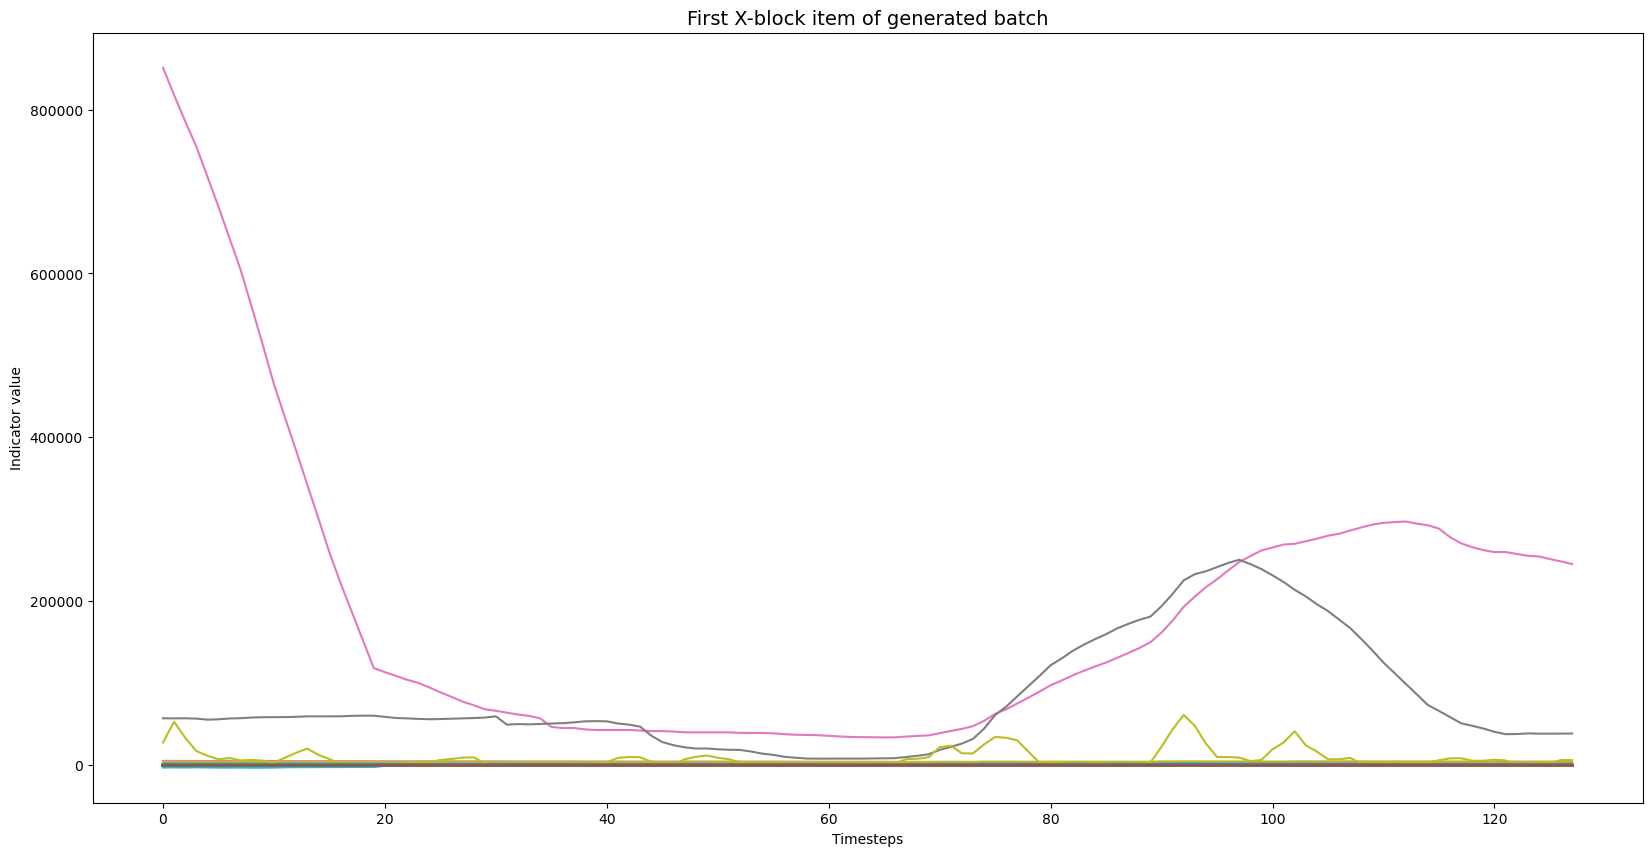

In [24]:
# Plot the first X-Block
chart_name="First X-block item of generated batch"
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title(chart_name, fontsize=14)

_ = ax1.plot(XT)

ax1.set_xlabel("Timesteps")
ax1.set_ylabel("Indicator value")

# Save the figure
fig_name = "FileListToDataStreamExample_" + chart_name.replace(" ", "_").replace("'", "").replace("(", "").replace(")", "") + ".svg"
plt.savefig(os.path.join(IMG_SAVE_PATH, fig_name), bbox_inches="tight")

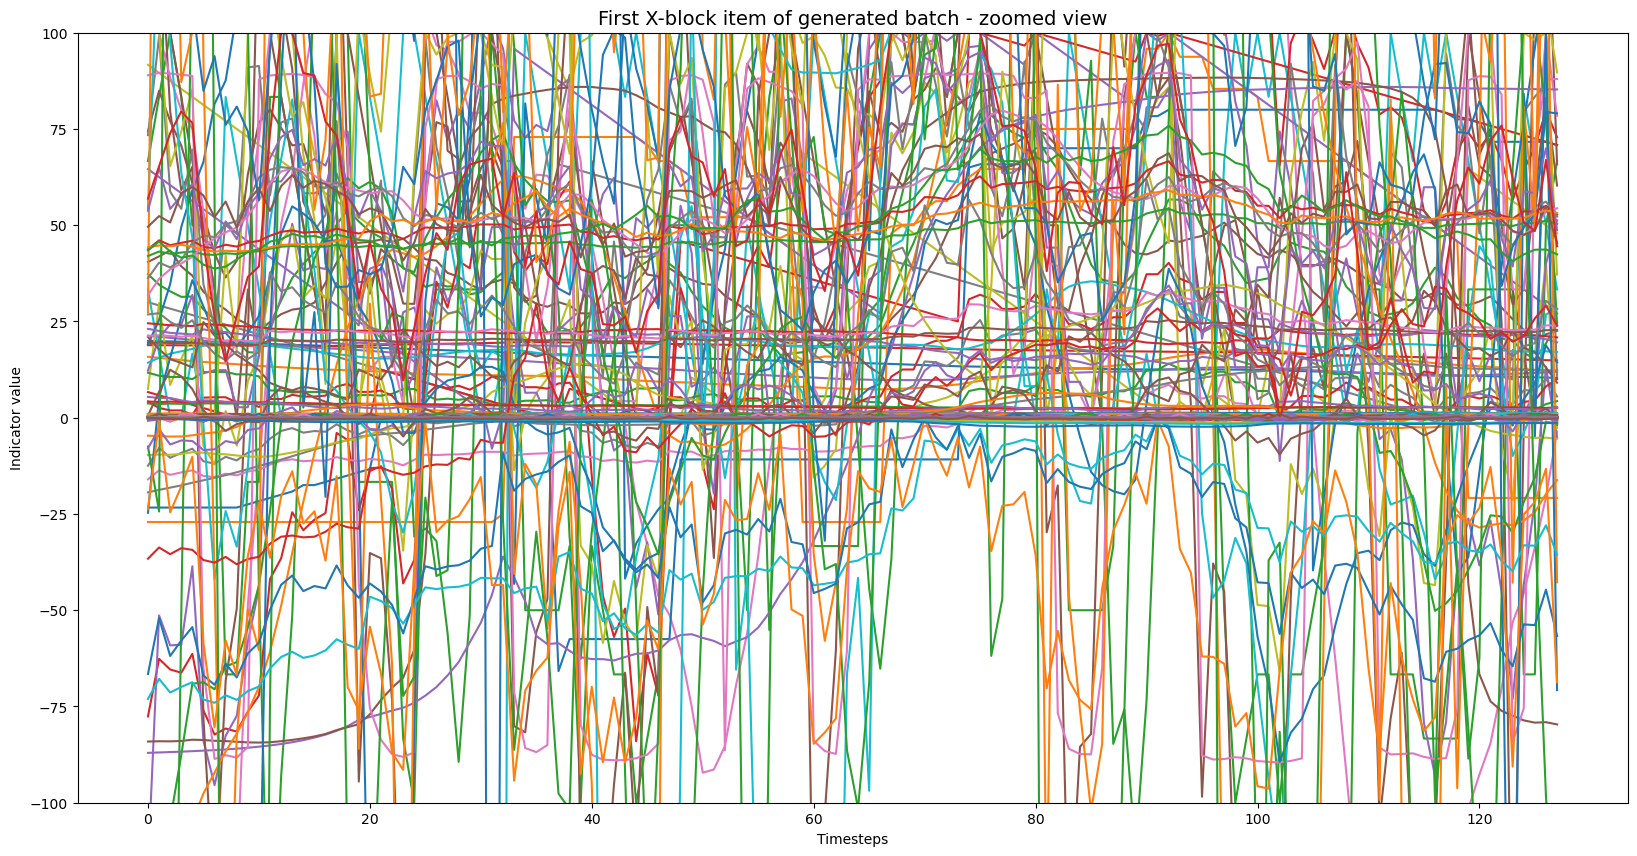

In [25]:
# Plot the first X-Block
chart_name="First X-block item of generated batch - zoomed view"
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title(chart_name, fontsize=14)

_ = ax1.plot(XT)

ax1.set_ylim(-100,100)

ax1.set_xlabel("Timesteps")
ax1.set_ylabel("Indicator value")

# Save the figure
fig_name = "FileListToDataStreamExample_" + chart_name.replace(" ", "_").replace("'", "").replace("(", "").replace(")", "") + ".svg"
plt.savefig(os.path.join(IMG_SAVE_PATH, fig_name), bbox_inches="tight")

---
## Combine the XT data and the yT direction information

In [26]:
y = batchLatest['y']
y

array([[ 0.80104011, -0.00827966],
       [ 0.79684097, -0.00856637],
       [ 0.79268774, -0.00884668],
       [ 0.78815006, -0.00909578],
       [ 0.78420974, -0.00935088],
       [ 0.78020722, -0.00959125],
       [ 0.77861253, -0.00989064],
       [ 0.77493211, -0.01019207],
       [ 0.77100019, -0.01052337],
       [ 0.76597368, -0.01085411],
       [ 0.76065844, -0.01117252],
       [ 0.75566595, -0.01147169],
       [ 0.74980847, -0.01185083],
       [ 0.74320089, -0.01222548],
       [ 0.73467381, -0.01264053],
       [ 0.72585294, -0.01301183],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,

In [27]:
yT = y[0,:]
yT

array([ 0.80104011, -0.00827966])

In [28]:
trainDataPoint = {"X":XT, "y":yT}
trainDataPoint

{'X': array([[ 1.99633105e+01,  1.58279204e+01,  3.73126596e+01, ...,
          5.68943612e+01,  0.00000000e+00,  0.00000000e+00],
        [ 1.98877793e+01,  1.55510607e+01,  3.45518213e+01, ...,
          6.52856925e+01, -2.12502965e-03, -1.32224616e-01],
        [ 1.98102625e+01,  1.52666845e+01,  3.28294503e+01, ...,
          7.39027164e+01, -5.43176891e-05, -1.42536019e-01],
        ...,
        [ 1.04777356e+01,  1.24543163e+01,  1.51635884e+01, ...,
          4.84943336e+01,  8.27744338e-04, -3.81800303e-01],
        [ 1.04198458e+01,  1.23645479e+01,  1.93021711e+01, ...,
          6.69531965e+01, -3.10785550e-04, -3.19496891e-01],
        [ 1.03689825e+01,  1.23157829e+01,  2.46314650e+01, ...,
          4.45333509e+01,  1.63910737e-03, -1.65471712e-01]]),
 'y': array([ 0.80104011, -0.00827966])}

## Conclusion

The information in `trainDataPoint` can be understood as looking a hourly tick and indicator chart zoomed to 128 hours (`X`), while having the information how the price direction (and its derivation) will be in the future (`y`). In the example above, the price will rise, as the direction is `0.8010`.

This method can be performed on a big dataset, like historical crypto data, to generate a very large amount of training data to create a neural network, which then may be able to predict the `y` future information on live tick data.

Beware that the link between the loaded .csv file and X/y data may be complicated, as some elements in the beginning and end may be cropped to provide lookback/lookahead, also the data generator can be shuffled, to mix up several currencies at different timestamps.